In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

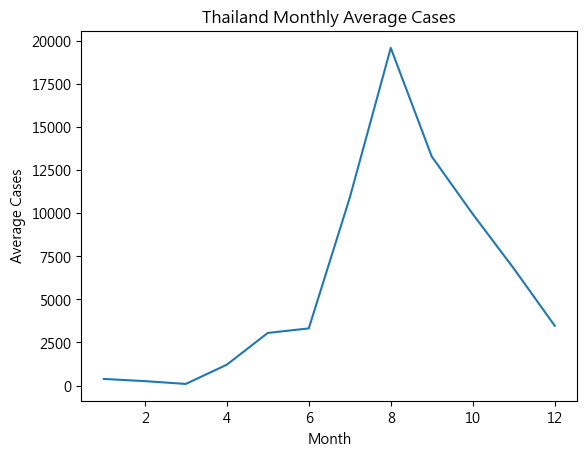

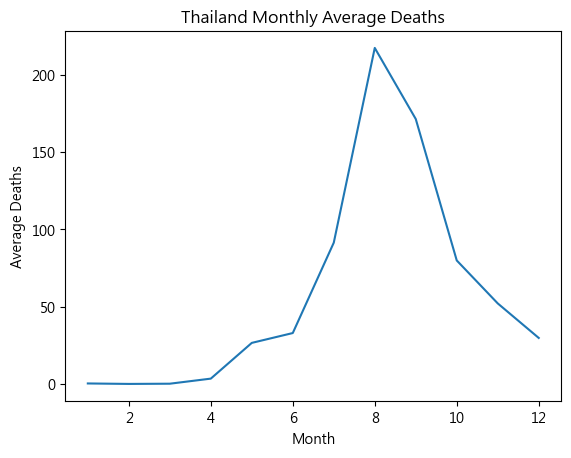

In [2]:
#---------------------------------------------考試填寫部分(第一小題)------------------------------------------------
import matplotlib.pyplot as plt
df = pd.read_csv("owid-covid-data.csv")
df_thai = df.loc[df['location'] == 'Thailand', ['location', 'date', 'new_cases', 'new_deaths']]
df_thai = df_thai.fillna(0)
# 將 date 欄位轉換為日期格式
df_thai['date'] = pd.to_datetime(df_thai['date'])

# 取出 2021 年的資料
df_thailand_2021 = df_thai[df_thai['date'].dt.year == 2021]
# 計算每個月的平均值
monthly_avg_case = df_thailand_2021.groupby(df_thailand_2021['date'].dt.month)['new_cases'].mean()
monthly_avg_death = df_thailand_2021.groupby(df_thailand_2021['date'].dt.month)['new_deaths'].mean()



#--------------------------------------------------------------------------------------------------------
# 設置Thailand Monthly Average Cases圖
plt.plot(monthly_avg_case)
plt.title('Thailand Monthly Average Cases')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()


# 設置Thailand Monthly Average Deaths圖
plt.plot(monthly_avg_death)
plt.title('Thailand Monthly Average Deaths')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.show()


d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\t

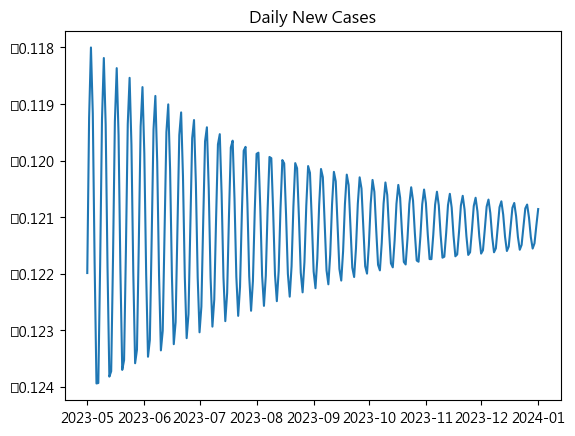

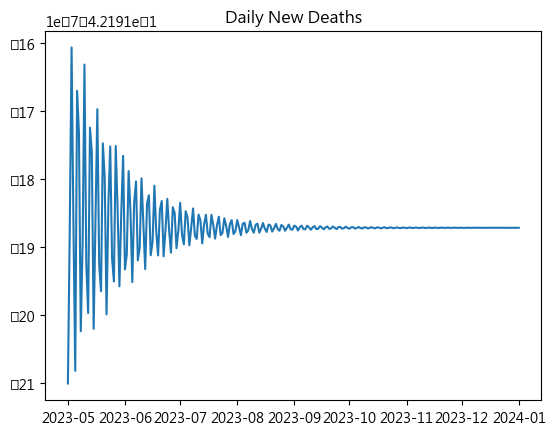

In [11]:
#------------------------------------考試填寫部分(第二小題)---------------------------------------------
# 複製資料
df_new = df_thai[['date', 'location', 'new_cases', 'new_deaths']].copy()

# 設置索引為 date 欄位
# 選定column中的date做為index
df_new.set_index('date', inplace=True)

# 正規化
df_new['new_cases'] = (df_new['new_cases'] - df_new['new_cases'].mean()) / df_new['new_cases'].std()
df_new['new_deaths'] = (df_new['new_deaths'] - df_new['new_deaths'].mean()) / df_new['new_deaths'].std()

# 按日期分割為 train 和 test
train_cases = df_new['new_cases'][df_new.index < '2022-07-01']
train_deaths = df_new['new_deaths'][df_new.index < '2022-07-01']
# 將 train_cases 與 train_deaths 合併成一個 DataFrame
train = pd.concat([train_cases, train_deaths], axis=1)
train.columns = ['new_cases', 'new_deaths']

test_cases = df_new['new_cases'][df_new.index >= '2022-07-01']
test_deaths = df_new['new_deaths'][df_new.index >= '2022-07-01']
# 將 test_cases 與 test_deaths 合併成一個 DataFrame
test = pd.concat([test_cases, test_deaths], axis=1)
test.columns = ['new_cases', 'new_deaths']





#-----------------------------------------------------------------------------------------------
# 建立ARIMA模型，並用訓練集擬合模型
model_case = ARIMA(train['new_cases'], order=(25, 1, 1))
model_death = ARIMA(train['new_deaths'], order=(25, 1, 1))
results_case = model_case.fit()
results_death = model_death.fit()

# 預測資料
case_pred = results_case.predict(start='2023-05-01', end='2024-01-01', typ='levels')
death_pred = results_death.predict(start='2023-05-01', end='2024-01-01', typ='levels')


# 繪製預測結果
plt.plot(case_pred, label='Predicted')
plt.title('Daily New Cases')
plt.show()

plt.plot(death_pred, label='Predicted')
plt.title('Daily New Deaths')
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
df_thai = df.loc[df['location'] == 'Thailand', ['location', 'date', 'new_cases', 'new_deaths']]
df_thai

,location,date,new_cases,new_deaths
269963,Thailand,2020-01-03,0.0,0.0
269964,Thailand,2020-01-04,0.0,0.0
269965,Thailand,2020-01-05,0.0,0.0
269966,Thailand,2020-01-06,0.0,0.0
269967,Thailand,2020-01-07,0.0,0.0
...,...,...,...,...
271168,Thailand,2023-04-22,1088.0,5.0
271169,Thailand,2023-04-23,NaN,0.0
271170,Thailand,2023-04-24,NaN,0.0
271171,Thailand,2023-04-25,NaN,0.0


In [8]:
# 複製資料
df_new = df_thai[['date', 'location', 'new_cases', 'new_deaths']].copy()

# 設置索引為 date 欄位
# 選定column中的date做為index
df_new.set_index('date', inplace=True)

# 正規化
df_new['new_cases'] = (df_new['new_cases'] - df_new['new_cases'].mean()) / df_new['new_cases'].std()
df_new['new_deaths'] = (df_new['new_deaths'] - df_new['new_deaths'].mean()) / df_new['new_deaths'].std()

# 按日期分割為 train 和 test
train_cases = df_new['new_cases'][df_new.index < '2022-07-01']
train_deaths = df_new['new_deaths'][df_new.index < '2022-07-01']
# 將 train_cases 與 train_deaths 合併成一個 DataFrame
train = pd.concat([train_cases, train_deaths], axis=1)
train.columns = ['new_cases', 'new_deaths']

test_cases = df_new['new_cases'][df_new.index >= '2022-07-01']
test_deaths = df_new['new_deaths'][df_new.index >= '2022-07-01']
# 將 test_cases 與 test_deaths 合併成一個 DataFrame
test = pd.concat([test_cases, test_deaths], axis=1)
test.columns = ['new_cases', 'new_deaths']

train

,new_cases,new_deaths
date,,
2020-01-03,-0.598048,-0.559511
2020-01-04,-0.598048,-0.559511
2020-01-05,-0.598048,-0.559511
2020-01-06,-0.598048,-0.559511
2020-01-07,-0.598048,-0.559511
...,...,...
2022-06-26,-0.234280,-0.221077
2022-06-27,-0.332641,-0.260893
2022-06-28,-0.328664,-0.300708
